<a href="https://colab.research.google.com/github/RoHIT4Kr7/Learn-AgenticAI/blob/main/act5graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install langgraph

In [7]:
from langgraph.graph import StateGraph, START, END
import random
from typing import TypedDict, List, Dict

In [11]:
class AgentState(TypedDict):
  player_name: str
  guesses: List[int]
  attempts: int
  lower_bound: int
  upper_bound: int
  initial_number:int
  guess_number:int
  counter: int
  target: int
  current_lower:int
  current_upper: int
  attempts: int
  system_guess:int


In [12]:
def generate_random(state: AgentState) -> AgentState:
    """Setup node to generate target number"""
    state["target"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["attempts"] = 0
    state["current_lower"] = state["lower_bound"]
    state["current_upper"] = state["upper_bound"]
    print(f"Target number: {state['target']} (for demonstration)")
    return state

def guess(state: AgentState) -> AgentState:
    """Guess node to make a single guess"""
    state["attempts"] += 1
    state["system_guess"] = random.randint(state["current_lower"], state["current_upper"])
    print(f"Attempt {state['attempts']}: Guessed {state['system_guess']} (range: {state['current_lower']}-{state['current_upper']})")
    return state


def hint_node(state: AgentState) -> AgentState:
    """Hint node to update bounds based on guess"""
    if state["target"] > state["system_guess"]:
        print(f"Hint: Target is higher than {state['system_guess']}")
        state["current_lower"] = state["system_guess"] + 1
    elif state["target"] < state["system_guess"]:
        print(f"Hint: Target is lower than {state['system_guess']}")
        state["current_upper"] = state["system_guess"] - 1
    return state


def should_continue(state: AgentState) -> str:
    """Routing function for conditional edges"""
    if state["system_guess"] == state["target"]:
        print(f"Guessed correctly! Number was {state['target']}. Attempts: {state['attempts']}")
        return "end"
    elif state["attempts"] >= 7:
        print(f"Failed to guess the number {state['target']} in 7 attempts.")
        return "end"
    else:
        return "continue"



In [15]:
# Build the graph
graph = StateGraph(AgentState)

# Add nodes
graph.add_node("setup", generate_random)
graph.add_node("guess", guess)
graph.add_node("hint_node", hint_node)

# Add edges
graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")

# Add conditional edges
graph.add_conditional_edges(
    "guess",
    should_continue,
    {
        "continue": "hint_node",
        "end": END
    }
)

graph.add_edge("hint_node", "guess")

# Compile the graph
app = graph.compile()

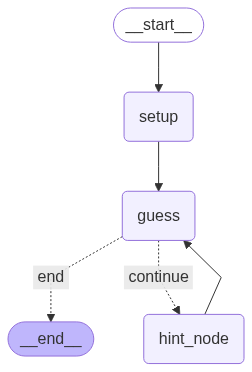

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))